# Transforamtion des données 

transformation des données suivant nos décision .... bla bla bla bla bla bla bla bla

## Chargement des données

In [1]:
import os
import pandas as pd

DATA_ROOT = "./Data/"
# load data with path file on a dataframe 
def load_data(file_name:str,data_folder_path=DATA_ROOT):
    data_path = os.path.join(data_folder_path, file_name)
    if not os.path.isfile(data_path):
        print("error file not found :",data_path)
        df= pd.DataFrame()
    else :
        df = pd.read_csv(data_path)
    return df

In [40]:
data_merge = load_data("DataMerge.csv")
data_merge = data_merge.drop("Unnamed: 0",axis=1)
data_merge.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,MeanWorkingTime
0,3.0,4.0,2.0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,...,11,0,1.0,6,1,0,0,3,3,7.373651
1,3.0,2.0,4.0,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,...,23,1,6.0,3,5,1,4,2,4,7.718969
2,2.0,2.0,1.0,32,0,Travel_Frequently,Research & Development,17,4,Other,...,15,3,5.0,2,5,0,3,3,3,7.013240
3,4.0,4.0,3.0,38,0,Non-Travel,Research & Development,2,5,Life Sciences,...,11,3,13.0,5,8,7,5,2,3,7.193678
4,4.0,1.0,3.0,32,0,Travel_Rarely,Research & Development,10,1,Medical,...,12,2,9.0,2,6,0,4,3,3,8.006175


In [41]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300 entries, 0 to 4299
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EnvironmentSatisfaction  4300 non-null   float64
 1   JobSatisfaction          4300 non-null   float64
 2   WorkLifeBalance          4300 non-null   float64
 3   Age                      4300 non-null   int64  
 4   Attrition                4300 non-null   int64  
 5   BusinessTravel           4300 non-null   object 
 6   Department               4300 non-null   object 
 7   DistanceFromHome         4300 non-null   int64  
 8   Education                4300 non-null   int64  
 9   EducationField           4300 non-null   object 
 10  Gender                   4300 non-null   object 
 11  JobLevel                 4300 non-null   int64  
 12  JobRole                  4300 non-null   object 
 13  MaritalStatus            4300 non-null   object 
 14  MonthlyIncome           

## Transformation des données avec un pipeline
Etapes :

A l'aide de la pipline nous supprimons les attributs de types string à l'aide d'un encodeur incrementale sur les champs :
- MaritalStatus
- JobRole
- BusinessTravel
- Department
- EducationField
- Male /female

Visualisation de la matrice des données.

In [74]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin


data = data_merge.drop("Attrition", axis=1)
data_labels = data_merge["Attrition"].copy()

#remplace gender male=1 / female=0
data.Gender.replace(to_replace=dict(Male=1, Female=0), inplace=True)
 
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
    
 
data_num = data.select_dtypes(include=[np.number])
 
num_attribs = list(data_num)
cat_attribs = ["MaritalStatus", "JobRole", "BusinessTravel", "Department", "EducationField"]
 
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])
 
data_prepared = full_pipeline.fit_transform(data)


data_prepared

array([[ 0.25240281,  1.15735878, -1.07551815, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.25240281, -0.65794042,  1.75046904, ...,  0.        ,
         0.        ,  0.        ],
       [-0.66194603, -0.65794042, -2.48851174, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.16675164,  1.15735878,  0.33747545, ...,  1.        ,
         0.        ,  0.        ],
       [-1.57629486,  0.24970918,  0.33747545, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.16675164, -1.56559001,  0.33747545, ...,  1.        ,
         0.        ,  0.        ]])

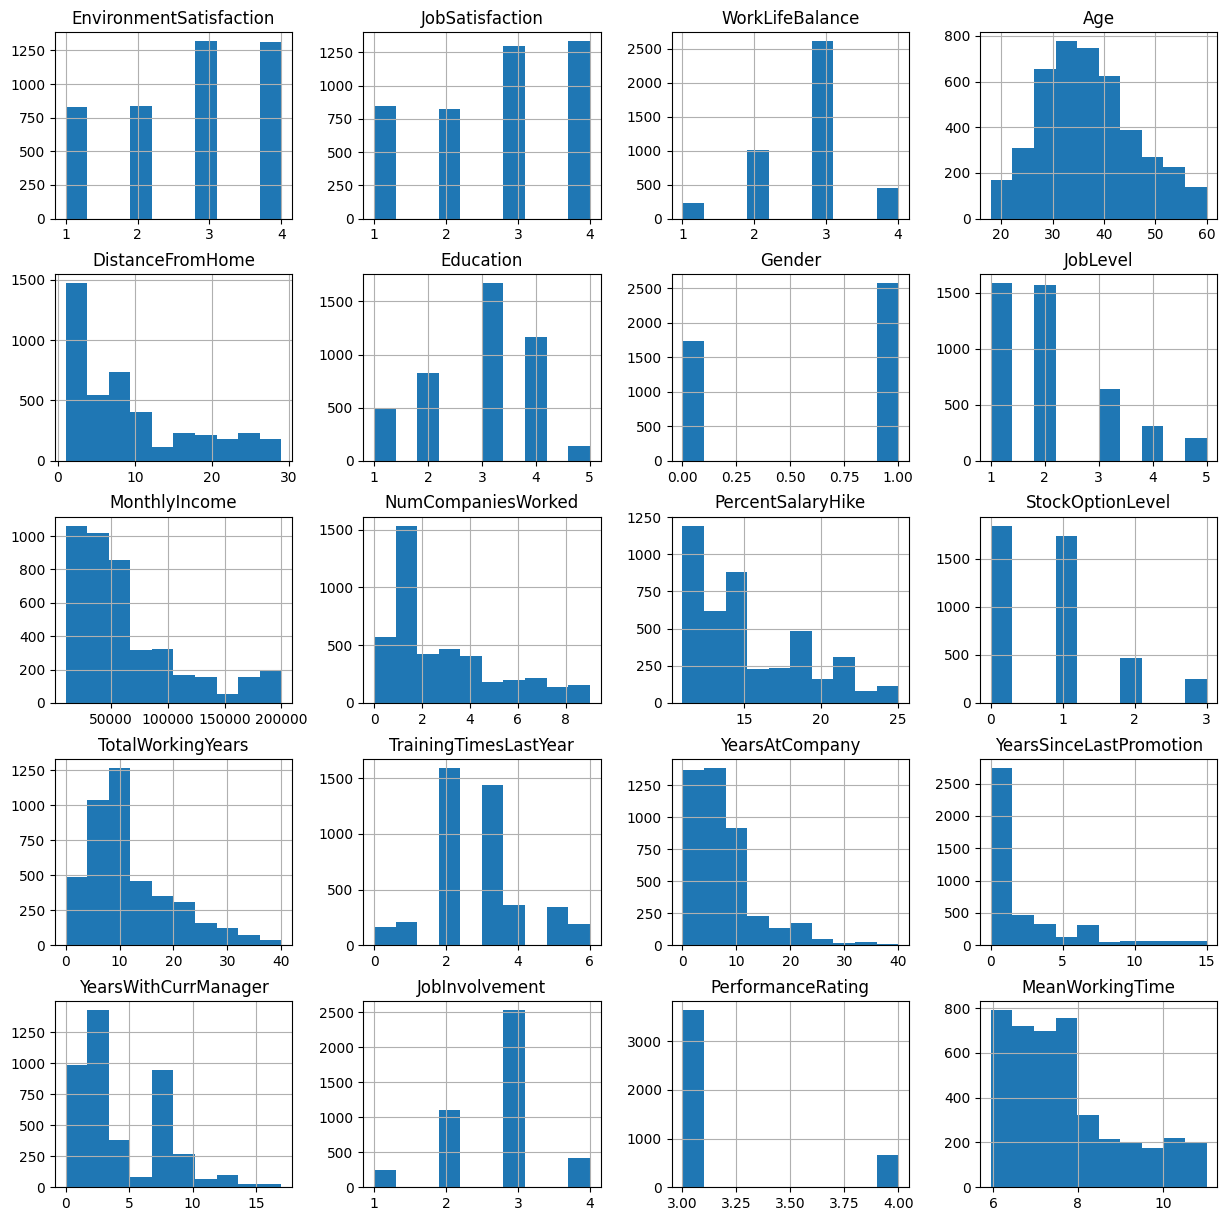

In [65]:
from matplotlib import pyplot as plt

data.hist(figsize=(15,15))
plt.show()

In [56]:
data.describe()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,MeanWorkingTime
count,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,2.723953,2.724884,2.761163,36.926977,9.197907,2.913256,0.597907,2.066977,65059.844186,2.690000,15.210698,0.795349,11.285116,2.796279,7.026047,2.190000,4.132558,2.728837,3.153953,7.702877
std,1.093802,1.101875,0.707800,9.146517,8.097059,1.024774,0.490378,1.106633,47045.398914,2.495764,3.662777,0.853534,7.790052,1.290142,6.148036,3.230818,3.565831,0.710769,0.360946,1.342717
min,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,0.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,5.950504
25%,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,0.000000,1.000000,29260.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,6.666876
50%,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,1.000000,2.000000,49360.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,7.407506
75%,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,1.000000,3.000000,83802.500000,4.000000,18.000000,1.000000,15.000000,3.000000,9.250000,3.000000,7.000000,3.000000,3.000000,8.380738
max,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,1.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,11.030960


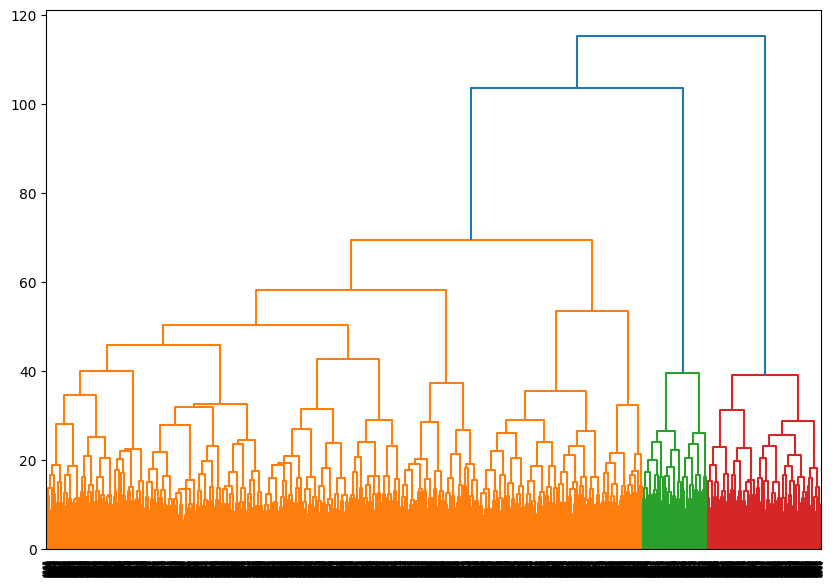

In [98]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure( figsize=(10, 7))

dendrogram(linkage(data_prepared, method='ward'), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()


In [97]:
data_merge.groupby(['Gender']).mean()

C:\Users\steve\AppData\Local\Temp\ipykernel_3512\3588709889.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_merge.groupby(['Gender']).mean()


,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,MeanWorkingTime
Gender,,,,,,,,,,,,,,,,,,,,
Female,2.753615,2.706767,2.790630,37.373626,0.153268,9.624639,2.936379,2.098901,64707.356854,2.894737,15.145171,0.775014,11.537883,2.843840,7.165414,2.287449,4.124928,2.704453,3.130133,7.693797
Male,2.704006,2.737067,2.741346,36.626604,0.167250,8.910930,2.897705,2.045508,65296.892260,2.552314,15.254765,0.809024,11.115130,2.764294,6.932322,2.124465,4.137690,2.745235,3.169973,7.708984
